In [ ]:
import pandas as pd

# Read the data
data = pd.read_csv("Main file.csv")

# Extract unique values from the Parameter Name"column
unique_parameters = data["Parameter Name"].unique()

# Print unique parameter names
print(unique_parameters)

['Ozone' 'PM2.5 - Local Conditions' 'Wind Speed - Resultant'
 'Wind Direction - Resultant' 'Outdoor Temperature' 'Relative Humidity '
 'Solar radiation' 'Barometric pressure' 'Rain/melt precipitation'
 'Carbon monoxide' 'Sulfur dioxide' 'SO2 max 5-min avg'
 'Reactive oxides of nitrogen (NOy)' 'Nitric oxide (NO)'
 'Nitrogen dioxide (NO2)' 'Oxides of nitrogen (NOx)' 'Formaldehyde'
 'Acetaldehyde' 'Propionaldehyde' 'Butyraldehyde' 'Hexanaldehyde'
 'Crotonaldehyde' 'Acetone' 'Methyl ethyl ketone' 'Benzaldehyde'
 'Light Absorption Coeffiecient' 'Sample Volume'
 'Average Ambient Temperature' 'Average Ambient Pressure'
 'Sample Flow Rate CV - Teflon Filter'
 'Sample Flow Rate CV - Nylon Filter'
 'Sample Flow Rate CV - Quartz Filter' 'Sample Volume - Teflon Filter'
 'Sample Volume - Nylon Filter' 'Sample Volume - Quartz Filter'
 'Average Ambient Temperature for URG3000N'
 'Average Ambient Pressure for URG3000N' 'PM10 Total 0-10um STP'
 'PM10-2.5 - Local Conditions' 'Antimony PM2.5 LC' 'Arsenic

In [ ]:
desired_parameters = ['Ozone', 'PM2.5 - Local Conditions', 'Carbon monoxide', 'Sulfur dioxide', 'Nitrogen dioxide (NO2)', 'PM10 Total 0-10um STP', 'PM10-2.5 - Local Conditions', 'Sulfur PM2.5 LC']

# Filter rows with desired parameter names
filtered_data = data[data['Parameter Name'].isin(desired_parameters)]

filtered_data.to_csv("filtered_data.csv", index=False)

# Print filtered data
print(filtered_data)

       State Code  County Code            Parameter Name  \
0               1            3                     Ozone   
1               1            3                     Ozone   
2               1            3                     Ozone   
3               1            3                     Ozone   
4               1            3  PM2.5 - Local Conditions   
...           ...          ...                       ...   
51253          80           26  PM2.5 - Local Conditions   
51254          80           26                     Ozone   
51255          80           26                     Ozone   
51256          80           26                     Ozone   
51257          80           26                     Ozone   

                  Units of Measure  Arithmetic Mean  Arithmetic Standard Dev  \
0                Parts per million         0.047051                 0.011497   
1                Parts per million         0.042835                 0.010781   
2                Parts per million     

In [ ]:
pivot_data = filtered_data.pivot_table(index=['State Name', 'County Name'], columns='Parameter Name', values='Arithmetic Mean').reset_index()

# Rename the columns
pivot_data.columns.name = None  # Remove the column name
pivot_data = pivot_data.rename(columns={'State Name': 'State', 'County Name': 'County'})

# Output pivoted data to a new CSV file
pivot_data.to_csv("formatted_data.csv", index=False)

# Print confirmation message
print("Formatted data has been saved to formatted_data.csv")
print(pivot_data)

Formatted data has been saved to formatted_data.csv
       State      County  Carbon monoxide  Nitrogen dioxide (NO2)     Ozone  \
0    Alabama     Baldwin              NaN                     NaN  0.043890   
1    Alabama        Clay              NaN                     NaN       NaN   
2    Alabama      DeKalb              NaN                     NaN  0.047809   
3    Alabama      Elmore              NaN                     NaN  0.044029   
4    Alabama      Etowah              NaN                     NaN  0.046630   
..       ...         ...              ...                     ...       ...   
945  Wyoming    Sublette              NaN                2.738518  0.052875   
946  Wyoming  Sweetwater              NaN                4.135576  0.053022   
947  Wyoming       Teton         0.119769                2.659627  0.047780   
948  Wyoming       Uinta              NaN                     NaN       NaN   
949  Wyoming      Weston              NaN                     NaN  0.047493   


In [ ]:
import pandas as pd

# Read the data from formatted_data.csv
formatted_data = pd.read_csv("formatted_data.csv")

# Read the data from Book4.csv
book_4 = pd.read_csv("Book4.csv")

# Perform a left merge on 'State' and 'County' columns with suffixes for duplicate columns
merged_data = pd.merge(book_4, formatted_data, on=['State', 'County'], how='left', suffixes=('_book_4', '_formatted_data'))

# Save the merged data to a new CSV file
merged_data.to_csv('merged_data.csv', index=False)

In [ ]:
import pandas as pd

merged_data = pd.read_csv("merged_data.csv")

print(merged_data)

        State    County  Carbon monoxide  Nitrogen dioxide (NO2)     Ozone  \
0     Alabama   Autauga              NaN                     NaN       NaN   
1     Alabama   Baldwin              NaN                     NaN  0.043890   
2     Alabama   Barbour              NaN                     NaN       NaN   
3     Alabama      Bibb              NaN                     NaN       NaN   
4     Alabama    Blount              NaN                     NaN       NaN   
...       ...       ...              ...                     ...       ...   
3076  Wyoming     Teton         0.119769                2.659627  0.047780   
3077  Wyoming     Uinta              NaN                     NaN       NaN   
3078  Wyoming  Washakie              NaN                     NaN       NaN   
3079  Wyoming    Weston              NaN                     NaN  0.047493   
3080      NaN       NaN              NaN                     NaN       NaN   

      PM10 Total 0-10um STP  PM10-2.5 - Local Conditions  \
0  

In [ ]:
merged_data = merged_data.drop(['Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13'], axis=1)

print(merged_data)

        State    County  Carbon monoxide  Nitrogen dioxide (NO2)     Ozone  \
0     Alabama   Autauga              NaN                     NaN       NaN   
1     Alabama   Baldwin              NaN                     NaN  0.043890   
2     Alabama   Barbour              NaN                     NaN       NaN   
3     Alabama      Bibb              NaN                     NaN       NaN   
4     Alabama    Blount              NaN                     NaN       NaN   
...       ...       ...              ...                     ...       ...   
3076  Wyoming     Teton         0.119769                2.659627  0.047780   
3077  Wyoming     Uinta              NaN                     NaN       NaN   
3078  Wyoming  Washakie              NaN                     NaN       NaN   
3079  Wyoming    Weston              NaN                     NaN  0.047493   
3080      NaN       NaN              NaN                     NaN       NaN   

      PM10 Total 0-10um STP  PM10-2.5 - Local Conditions  \
0  

In [ ]:
county_COPD_prev = pd.read_csv("County_COPD_prevalence.csv")

print(county_COPD_prev)

                 FullGeoName  LocationID Public_Health_Jurisdiction  \
0            CA, Santa Clara        6085                         CA   
1             NM, Los Alamos       35028                         NM   
2      VA, Falls Church City       51610                         VA   
3              CA, San Mateo        6081                         CA   
4                 MD, Howard       24027                         MD   
...                      ...         ...                        ...   
3141             FL, Wakulla       12129                         FL   
3142              FL, Walton       12131                         FL   
3143          FL, Washington       12133                         FL   
3144        VA, Bedford City       51515                         VA   
3145  VA, Clifton Forge City       51560                         VA   

       StateDesc        County  Percent_COPD 95% Confidence Interval  \
0     California   Santa Clara           3.3               2.7 - 4.0   
1  

In [ ]:
import pandas as pd

merged_COPD_data = pd.merge(merged_data, county_COPD_prev[['StateDesc', 'County', 'Percent_COPD']],
                       left_on=['State', 'County'], right_on=['StateDesc', 'County'], how='left')

# Drop the 'StateDesc' column as it's redundant
merged_COPD_data.drop('StateDesc', axis=1, inplace=True)

# Save the updated data to a new CSV file
merged_COPD_data.to_csv('merged_data_with_copd.csv', index=False)

print(merged_COPD_data)

        State    County  Carbon monoxide  Nitrogen dioxide (NO2)     Ozone  \
0     Alabama   Autauga              NaN                     NaN       NaN   
1     Alabama   Baldwin              NaN                     NaN  0.043890   
2     Alabama   Barbour              NaN                     NaN       NaN   
3     Alabama      Bibb              NaN                     NaN       NaN   
4     Alabama    Blount              NaN                     NaN       NaN   
...       ...       ...              ...                     ...       ...   
3076  Wyoming     Teton         0.119769                2.659627  0.047780   
3077  Wyoming     Uinta              NaN                     NaN       NaN   
3078  Wyoming  Washakie              NaN                     NaN       NaN   
3079  Wyoming    Weston              NaN                     NaN  0.047493   
3080      NaN       NaN              NaN                     NaN       NaN   

      PM10 Total 0-10um STP  PM10-2.5 - Local Conditions  \
0  

In [ ]:
aglp = pd.read_csv("aglp.csv")

print(aglp)

        State    County  Carbon monoxide (CO)  Nitrogen dioxide (NO2)  \
0     Alabama   Autauga                   NaN                     NaN   
1     Alabama   Baldwin                   NaN                     NaN   
2     Alabama   Barbour                   NaN                     NaN   
3     Alabama      Bibb                   NaN                     NaN   
4     Alabama    Blount                   NaN                     NaN   
...       ...       ...                   ...                     ...   
3076  Wyoming     Teton              0.119769                2.659627   
3077  Wyoming     Uinta                   NaN                     NaN   
3078  Wyoming  Washakie                   NaN                     NaN   
3079  Wyoming    Weston                   NaN                     NaN   
3080      NaN       NaN                   NaN                     NaN   

         Ozone  PM10 Total 0-10um STP  PM10-2.5 - Local Conditions  \
0          NaN                    NaN                

In [ ]:
import pandas as pd

# Group the DataFrame by State to calculate state averages
state_averages = aglp.groupby('State')[['Carbon monoxide (CO)', 'Nitrogen dioxide (NO2)',
                                       'Ozone', 'PM10 Total 0-10um STP',
                                       'PM10-2.5 - Local Conditions',
                                       'PM2.5 - Local Conditions', 'Sulfur PM2.5 LC',
                                       'Sulfur dioxide (SO2)']].mean()

print(state_averages)

state_averages.to_csv("state averages.csv")


                Carbon monoxide (CO)  Nitrogen dioxide (NO2)     Ozone  \
State                                                                    
Alabama                     0.165061               14.637899  0.045664   
Alaska                           NaN                     NaN       NaN   
Arizona                     0.260690               18.746847  0.051348   
Arkansas                    0.481803                6.424579  0.044119   
California                  0.248661                9.982214  0.040807   
Colorado                    0.244751                9.883975  0.050956   
Connecticut                 0.238539               17.101238  0.046291   
Delaware                         NaN                     NaN       NaN   
Florida                     0.294495               12.886268  0.042113   
Georgia                     0.449030               20.254894  0.045400   
Hawaii                      0.131617                6.813016  0.029713   
Idaho                       0.187602  

In [ ]:
import pandas as pd

# Group the DataFrame by State to calculate state medians
state_averages = aglp.groupby('State')[['Carbon monoxide (CO)', 'Nitrogen dioxide (NO2)',
                                       'Ozone', 'PM10 Total 0-10um STP',
                                       'PM10-2.5 - Local Conditions',
                                       'PM2.5 - Local Conditions', 'Sulfur PM2.5 LC',
                                       'Sulfur dioxide (SO2)']].median()

print(state_averages)

state_averages.to_csv("state_medians.csv")


                Carbon monoxide (CO)  Nitrogen dioxide (NO2)     Ozone  \
State                                                                    
Alabama                     0.165061               14.637899  0.045998   
Alaska                           NaN                     NaN       NaN   
Arizona                     0.260690               18.746847  0.052115   
Arkansas                    0.481803                6.424579  0.044240   
California                  0.255785                9.584995  0.040528   
Colorado                    0.243854                4.535743  0.051326   
Connecticut                 0.237965               16.272190  0.046305   
Delaware                         NaN                     NaN       NaN   
Florida                     0.284961               13.559076  0.041945   
Georgia                     0.449030               20.254894  0.043985   
Hawaii                      0.131617                6.813016  0.029713   
Idaho                       0.187602  

In [ ]:

state_averages = pd.read_csv("state averages.csv")

# Define the columns to be filled
columns_to_fill = ['Carbon monoxide (CO)', 'Nitrogen dioxide (NO2)', 'Ozone',
                   'PM10 Total 0-10um STP', 'PM10-2.5 - Local Conditions',
                   'PM2.5 - Local Conditions', 'Sulfur PM2.5 LC', 'Sulfur dioxide (SO2)']

for column in columns_to_fill:
    # Identify rows with missing values in the current column
    missing_rows = aglp[column].isnull()

    # Filter state averages for the states with missing values
    states_with_missing_values = aglp.loc[missing_rows, 'State']
    state_averages_to_use = state_averages[state_averages['State'].isin(states_with_missing_values)]

    # Fill missing values in the current column with corresponding values from state_averages
    aglp.loc[missing_rows, column] = aglp.loc[missing_rows].apply(lambda row: state_averages_to_use.loc[state_averages_to_use['State'] == row['State'], column].values[0] if len(state_averages_to_use.loc[state_averages_to_use['State'] == row['State']]) > 0 else None, axis=1)

aglp.to_csv("aglp_filled.csv", index=False)

In [ ]:
aglp_filled = pd.read_csv("aglp_filled.csv")

copd_median = aglp_filled["Percent_COPD"].median()

aglp_filled["Percent_COPD"].fillna(copd_median, inplace=True)

print(aglp_filled)

aglp_filled.to_csv("Final_COPD.csv", index=False)

        State    County  Carbon monoxide (CO)  Nitrogen dioxide (NO2)  \
0     Alabama   Autauga              0.165061               14.637899   
1     Alabama   Baldwin              0.165061               14.637899   
2     Alabama   Barbour              0.165061               14.637899   
3     Alabama      Bibb              0.165061               14.637899   
4     Alabama    Blount              0.165061               14.637899   
...       ...       ...                   ...                     ...   
3076  Wyoming     Teton              0.119769                2.659627   
3077  Wyoming     Uinta              0.113614                5.801451   
3078  Wyoming  Washakie              0.113614                5.801451   
3079  Wyoming    Weston              0.113614                5.801451   
3080      NaN       NaN                   NaN                     NaN   

         Ozone  PM10 Total 0-10um STP  PM10-2.5 - Local Conditions  \
0     0.045664              16.299542                

In [ ]:
import pandas as pd

final_copd = pd.read_csv("Final_COPD.csv")

povall_2021_min = final_copd["POVALL_2021"].min()
povall_2021_median = final_copd["POVALL_2021"].median()
povall_2021_max = final_copd["POVALL_2021"].max()


print("Lowest:", povall_2021_min)
print("Median:", povall_2021_median)
print("Highest:", povall_2021_max)

Lowest: 3.0
Median: 3605.0
Highest: 366448.0


In [ ]:
import pandas as pd

data = pd.read_csv("Final_COPD.csv")

data.dropna(subset=['POVALL_2021'], inplace=True)

custom_ranges = [0, 1000, 10000, 50000, 200000, float('inf')]
labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']

# Discretize the column into custom ranges
data['Encoded_POVALL'] = pd.cut(data['POVALL_2021'], bins=custom_ranges, labels=labels, right=False)

# Save the updated DataFrame to a new CSV file
data.to_csv("Final_COPD_encoded.csv", index=False)

print(data)

        State      County  Carbon monoxide (CO)  Nitrogen dioxide (NO2)  \
0     Alabama     Autauga              0.165061               14.637899   
1     Alabama     Baldwin              0.165061               14.637899   
2     Alabama     Barbour              0.165061               14.637899   
3     Alabama        Bibb              0.165061               14.637899   
4     Alabama      Blount              0.165061               14.637899   
...       ...         ...                   ...                     ...   
3075  Wyoming  Sweetwater              0.113614                4.135576   
3076  Wyoming       Teton              0.119769                2.659627   
3077  Wyoming       Uinta              0.113614                5.801451   
3078  Wyoming    Washakie              0.113614                5.801451   
3079  Wyoming      Weston              0.113614                5.801451   

         Ozone  PM10 Total 0-10um STP  PM10-2.5 - Local Conditions  \
0     0.045664              1

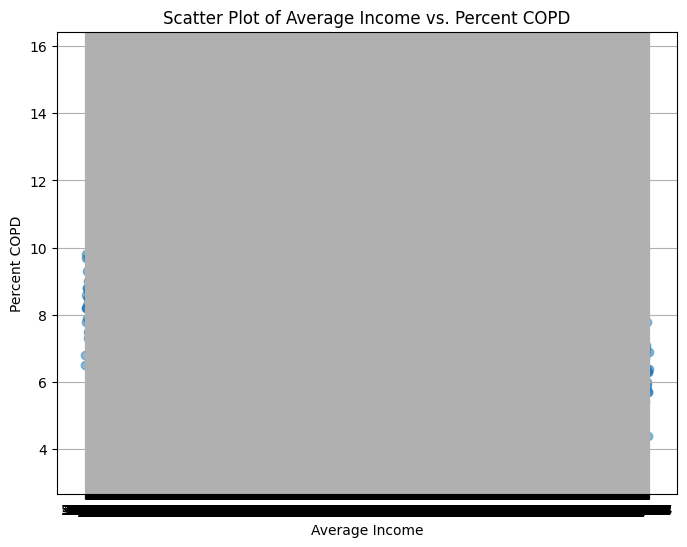

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(data['Average Income'], data['Percent_COPD'], alpha=0.5)
plt.xlabel('Average Income')
plt.ylabel('Percent COPD')
plt.title('Scatter Plot of Average Income vs. Percent COPD')
plt.grid(True)
plt.show()

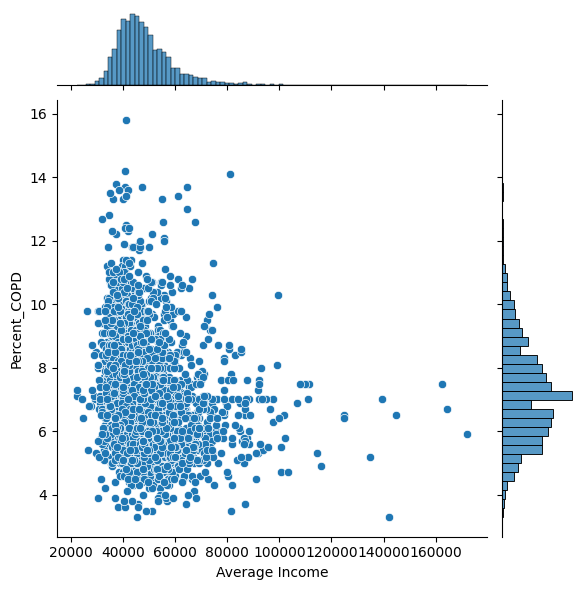

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
data['Average Income'] = data['Average Income'].str.replace(',', '').astype(float)

# Create a joint plot
sns.jointplot(x='Average Income', y='Percent_COPD', data=data, kind='scatter')
plt.show()

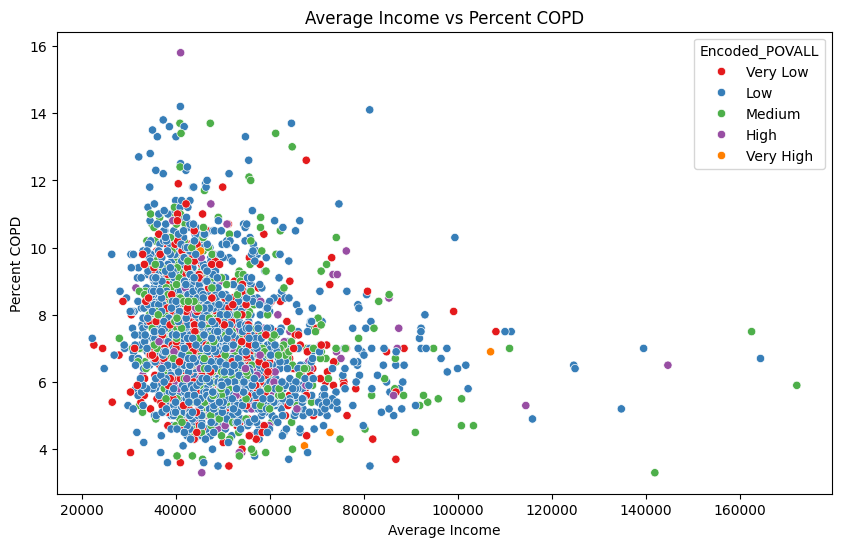

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data['Average Income'] = data['Average Income'].astype(float)

# Plot the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Average Income', y='Percent_COPD', hue='Encoded_POVALL', palette='Set1')
plt.xlabel('Average Income')
plt.ylabel('Percent COPD')
plt.title('Average Income vs Percent COPD')
plt.legend(title='Encoded_POVALL')
plt.show()

<ipython-input-59-579bb9c9e466>:17: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=data, x='POVALL_2021', y='Percent_COPD', palette='Set1')


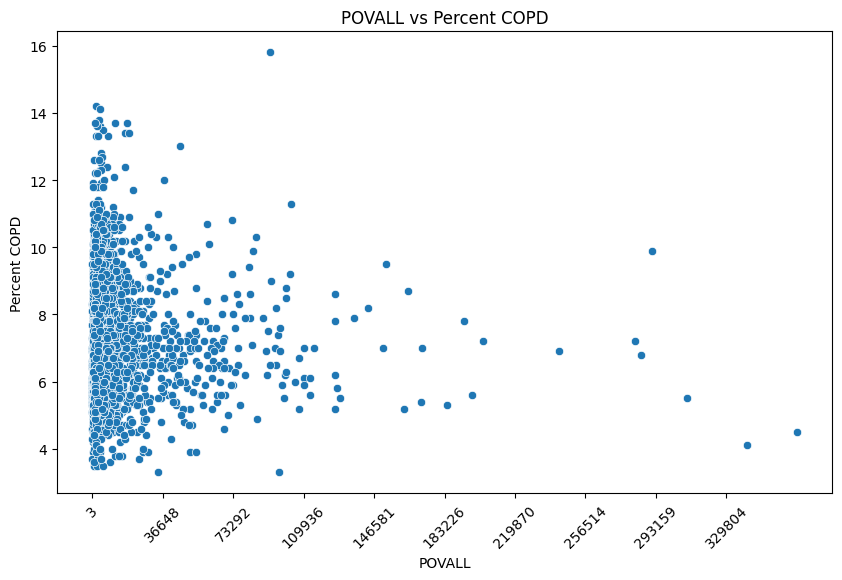

In [ ]:
import numpy as np

povall_range = data['POVALL_2021'].max() - data['POVALL_2021'].min()

num_intervals = 10


interval_width = povall_range / num_intervals

x_ticks = np.arange(data['POVALL_2021'].min(), data['POVALL_2021'].max(), interval_width)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='POVALL_2021', y='Percent_COPD', palette='Set1')
plt.xlabel('POVALL')
plt.ylabel('Percent COPD')
plt.title('POVALL vs Percent COPD')
plt.xticks(x_ticks, rotation=45)

plt.show()